## 4.Project/homework

Choose one of the following topics and solve it:

### 4.1 **Diabetes Dataset**.

Predict whether a patient has diabetes based on the following diagnostic measurements:
- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- Blood Pressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skinfold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age (years)
- The outcome is a binary class (0 or 1)

Use MLP based model and Keras API.

### 4.2 **Titanic dataset**

Same as lab04 Classification. Use the feature engineering discussed in the project class.

Use MLP based model and Keras API.

**This homework is obligatory. Please send colab link to kwant@agh.edu.pl before 24.04.2024.**

## https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/problem12.html
0. Survived Indicator
1. Passenger Class
2. Name
3. Sex
4. Age
5. Siblings Aboard
6. Parents Aboard
7. Fare paid in £s


- survival - Survival (0 = No; 1 = Yes)
- class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- name - Name
- sex - Sex
- age - Age
- sibsp - Number of Siblings/Spouses Aboard
- parch - Number of Parents/Children Aboard
- ticket - Ticket Number
- fare - Passenger Fare
- cabin - Cabin
- embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
- boat - Lifeboat (if survived)
- body - Body number (if did not survive and body was recovered)

In [11]:
!pip install -r ../requirements.txt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import platform
import pandas as pd
import numpy as np
import warnings
import sys;
#define Seaborn color palette to use
import numpy as np
from math import ceil
from itertools import zip_longest
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
import missingno as msno
import re



In [12]:
import logging
from rich.logging import RichHandler

FORMAT = "%(message)s"
logging.basicConfig(
    level="NOTSET", format=FORMAT, datefmt="[%X]", handlers=[RichHandler()]
)

logger = logging.getLogger("rich")


In [13]:

v = platform.python_version_tuple();
if float(v[1]) < 10:
    raise Exception("MUST USE Python 3.10 to use MATCH expression!")

warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")
np.set_printoptions(threshold=sys.maxsize)
pd.options.display.max_colwidth = 1000

from enum import Enum, unique

@unique
class PDataType(Enum):
    NUMERICAL = 1
    CATHEGORICAL = 2

def remove_distinct_value_features(df):
    return [e for e in df.columns if df[e].nunique() == 1]

def get_data_type(df, type):
    match type:
        case PDataType.NUMERICAL:
            return df.select_dtypes(np.number);
        case PDataType.CATHEGORICAL:
            return df.select_dtypes(include='object');

#select all cathegorigal data where the first value is more than percent%?
def get_cathegorical_data_by_percent(df, percent):
    col_names = get_data_type(df,PDataType.CATHEGORICAL)
    to_return = []
    for col_name in col_names:
        unique_v_df = (df[col_name].value_counts()).to_frame()
        unique_v_df['percent'] = (unique_v_df/unique_v_df.sum()*100)
        if unique_v_df.iloc[0].percent > percent:
            to_return.append(col_name);
    return to_return
    
def fill_empty_data_with(df, type, filler):
    col_names = get_data_type(df,type)
    for c in col_names:
        test_data_csv[c] = test_data_csv[c].fillna(filler)


In [14]:
DO_NOT_PLOT = False

In [15]:


def plot_pie_for_unique_category(df,col_name_x, ax):
    if not DO_NOT_PLOT:
        colors = sns.color_palette('pastel')
        unique_v_df = (df[col_name_x].value_counts()).to_frame()
        unique_v_df['percent'] = (unique_v_df/unique_v_df.sum()*100)
        unique_v_df.plot.pie(y='count', use_index=True,autopct='%0.2f%%', title = f"{col_name_x}", ax = ax)


def plot_hist_for_unique_category(df,col_name_x,col_name_y):
    if not DO_NOT_PLOT:
        unique_v_df = (df[col_name_x].value_counts()).to_frame()
        unique_v_df['percent'] = (unique_v_df/unique_v_df.sum()*100)
        fig, axs = plt.subplots(nrows=len(unique_v_df), figsize=(16,10))
        i = 0;
        for index, row in unique_v_df.iterrows():
            value_percent = row.iloc[1];
            value = row.iloc[0];
            name = index;
            sns.histplot(data=df.loc[df[col_name_x] == name], x=col_name_y, ax = axs[i],bins=100, label =f'{col_name_x} {name} : {value} | {value_percent:.2f}%')
            axs[i].set_xlim(df[col_name_y].min(), df[col_name_y].max())
            axs[i].legend()
            i+=1
        fig.suptitle(f"{col_name_x} on {col_name_y}")
        plt.show()
        
def plot_hist_for_stat(df,col_name_x, stat = 'count'):
    if not DO_NOT_PLOT:
        sns.histplot(data=df, x=col_name_x, stat = stat)
        plt.legend()
        plt.show()
                     
    
def plot_unique_category(df,col_name_x,col_name_y):
    if not DO_NOT_PLOT:
        plot_hist_for_unique_category(df,col_name_x,col_name_y)
        fig, axs = plt.subplots(1, 2, figsize=(10,10))
        fig.tight_layout()
        plot_pie_for_unique_category(df,col_name_x,axs[0])
        sns.boxenplot(data=df, x=col_name_x, y=col_name_y, ax = axs[1])
        plt.show()
    
def plot_hist_for_unique_category_array(df,col_names_x,col_name_y):
    if not DO_NOT_PLOT:
        for col_name_x in col_names_x:
            plot_hist_for_unique_category(df,col_name_x,col_name_y)
            plt.show()

#RAVEL returns flatted array, depricated. use to_numpy
def plot_pie_for_unique_category_array(df,col_names_x):
    if not DO_NOT_PLOT:
        n_rows, n_cols = ceil(len(col_names_x) / 3), 3
        fig, axs = plt.subplots(ncols=n_cols, nrows=n_rows, figsize=(20, 80))
        for col_name_x,ax in zip_longest(col_names_x,axs.ravel()):
            if col_name_x is not None:
                colors = sns.color_palette('pastel')
                unique_v_df = (df[col_name_x].value_counts()).to_frame()
                unique_v_df['percent'] = (unique_v_df/unique_v_df.sum()*100)
                unique_v_df.plot.pie(y='count', use_index=True,autopct='%0.2f%%', title = f"{col_name_x}",ax=ax )
            else:
                fig.delaxes(ax)
        plt.draw()
        plt.tight_layout()
    

def plot_correlation_for(df, col_name, n):
    corr = df.corr(numeric_only=True)[col_name].sort_values(ascending=False)
    top_corr = corr[1:n]
    selected_features = list(top_corr.index) + [col_name]
    correlation_matrix = df[selected_features].corr()
    mask = np.triu(correlation_matrix)
    if not DO_NOT_PLOT:
        plt.figure(figsize=(12, 8))
        sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5, fmt=".2f", vmin=-1, vmax=1,mask=mask)
        plt.title(f"Top of correlation with [{col_name}]", fontsize=16)
        plt.show()
    return top_corr

def plot_overall_correlation_for(df,target_cols,n_count):
    df_no_target = df.copy().drop(columns = target_cols)
    top_correlation = df_no_target.corr().unstack().sort_values(ascending = False).drop_duplicates()[1:n_count]
    top_correlation.plot.bar(grid = True)
    return  top_correlation
def scikit_model_vis(y_valid, y_pred):
    if not DO_NOT_PLOT:
        plt.figure()
        plt.scatter(y_valid, y_pred)
        plt.xlabel('ground truth (y_valid)')
        plt.ylabel('predict (y_pred)')
        plt.show()

    logger.info(f'MAE: {metrics.mean_absolute_error(y_valid, y_pred):.2f}')
    logger.info(f'MSE: {metrics.mean_squared_error(y_valid, y_pred):.2f}')
    logger.info(f'R2: {metrics.r2_score(y_valid, y_pred):.2f}')

In [16]:
df = pd.read_csv("../db/titanic_FR.csv")


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292 entries, 0 to 1291
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  1292 non-null   int64  
 1   name      1292 non-null   object 
 2   sex       1292 non-null   int64  
 3   age       1292 non-null   float64
 4   sibsp     1292 non-null   int64  
 5   parch     1292 non-null   int64  
 6   ticket    1292 non-null   int64  
 7   fare      1291 non-null   float64
 8   cabin     1292 non-null   int64  
 9   embarked  1292 non-null   object 
 10  boat      1292 non-null   int64  
 11  class_0   1292 non-null   float64
 12  class_1   1292 non-null   float64
 13  class_2   1292 non-null   float64
dtypes: float64(5), int64(7), object(2)
memory usage: 141.4+ KB


## Convert some data, cleanup

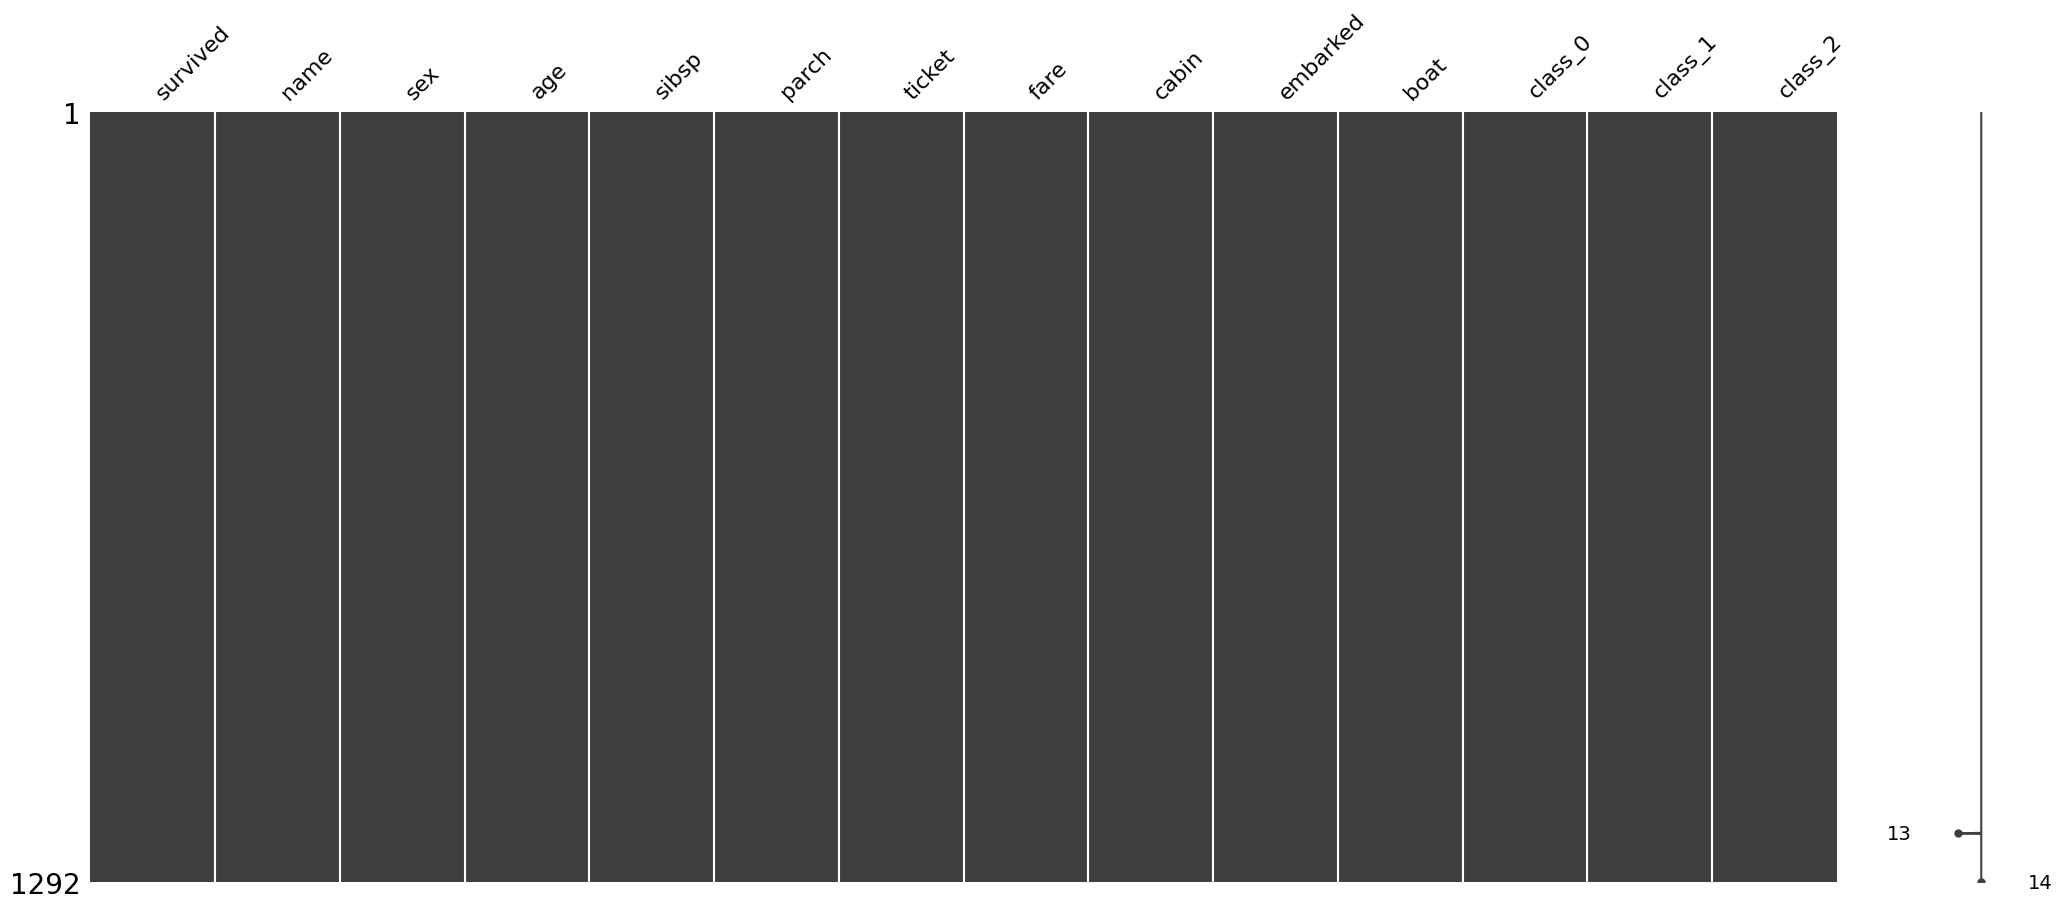

In [18]:
msno.matrix(df)
plt.show()